In [2]:
import numpy as np
import os
import sys
import cv2 
import matplotlib.pyplot as plt
import pickle
import random
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

X_Temp = open('x_data_n','rb')
x_data_np = pickle.load(X_Temp)

Y_Temp = open('y_data_n','rb')
y_data_np = pickle.load(Y_Temp)

In [4]:
x_data_np = x_data_np.reshape(-1, 50, 50, 1)

In [5]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_data_np, y_data_np, test_size=0.3,random_state=101)

In [6]:
model = Sequential()
model.add(Conv2D(150, (3, 3), input_shape=x_data_np.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(75, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
model.fit(X_Train, Y_Train, batch_size=30, epochs=4, validation_split=0.3)
model.save('64x3CNN.model')

Epoch 1/4
26/26 [==============================] - 3s 109ms/step - loss: 0.6939 - accuracy: 0.5806 - val_loss: 0.6725 - val_accuracy: 0.5621
Epoch 2/4
26/26 [==============================] - 3s 105ms/step - loss: 0.5196 - accuracy: 0.7350 - val_loss: 0.4967 - val_accuracy: 0.6801
Epoch 3/4
26/26 [==============================] - 3s 109ms/step - loss: 0.3537 - accuracy: 0.8402 - val_loss: 0.2970 - val_accuracy: 0.9068
Epoch 4/4
26/26 [==============================] - 3s 106ms/step - loss: 0.3557 - accuracy: 0.8522 - val_loss: 0.2682 - val_accuracy: 0.9161
INFO:tensorflow:Assets written to: 64x3CNN.model\assets


In [8]:
preds = model.evaluate(X_Test, Y_Test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

15/15 [==============================] - 0s 28ms/step - loss: 0.2883 - accuracy: 0.8935
Loss = 0.28829842805862427
Test Accuracy = 0.893478274345398


In [9]:
def prepare(filepath):
    training_date = []
    
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(IMAGE_SIZE,IMAGE_SIZE))
    new_image =  new_array.reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
    return new_image

In [10]:
model = tf.keras.models.load_model('64x3CNN.model')

In [11]:
print("LET SEE WE CAN UPLOAD FROM USER ")

LET SEE WE CAN UPLOAD FROM USER 


TypeError: Image data of dtype object cannot be converted to float

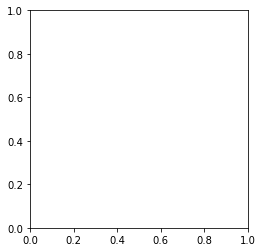

In [12]:
filepath = 'Desktop/Project/dataset/Not leprosy/fixed-drug-eruption-45.jpg'
img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array)



In [20]:
test = model.predict([prepare(filepath='Desktop/Project/dataset/Not leprosy/fixed-drug-eruption-45.jpg')])

NameError: name 'IMAGE_SIZE' is not defined

In [52]:
print(CATERGORIES[int(test[0][0])])

Fixed wing


In [53]:
print("THANK U")

THANK U
